# Titanic Disaster

Bu tekrar bölümünde, farklı özelliklere sahip tüm yolcuları listeleyen ünlü  [Titanic](https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view) veri setini inceleyeceğiz.

❓`matplotlib`, `numpy` ve `pandas` kütüphanelerini her zamanki şekilde yükleyerek başla.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

❓CSV verisini yükleyip `titanic_df` adlı bir değişkene ata.

CSV dosyasına şu URL’den ulaşılabilir: https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [34]:
import pandas as pd

titanic_df = pd.read_csv("ML_Titanic_dataset (1).csv")


In [35]:
titanic_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


❓ Veri setini her zamanki yöntemlerle incele (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

 `B` tuşuna basarak yeni hücreler eklemekten çekinme.

In [36]:
titanic_df.shape

(891, 12)

In [37]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
titanic_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [40]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

687 satırda  `Cabin` 687 satırda  bilgisinin eksik olduğu (NaN olduğu) görülüyor.

❓`titanic_df` içerisindeki  `Cabin` sütunundan kurtulmak için [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) fonksiyonunu kullan.

In [41]:
titanic_df = titanic_df.drop(columns=["Cabin"])


In [42]:
titanic_df.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S


## Classes Analysis

Bilet dağılımına bir göz atalım.

❓ Bir `groupby()`,kullanarak, her sınıf (1, 2 veya 3) için satılan bilet sayısını hesaplayan bir`pclass_df` dataframe oluştur.

In [51]:
pclass_df=titanic_df.groupby("Pclass")["Ticket"].count().reset_index()
pclass_df

,Pclass,Ticket
0,1,216
1,2,184
2,3,491


Sayıya bakmak çok görsel değil, veriyi bir grafikle anlamlandırmayı deneyelim.

❓ Bir önceki soruda oluşturduğun `pclass_df` dataframe’ini bir bar chart olarak plot et.

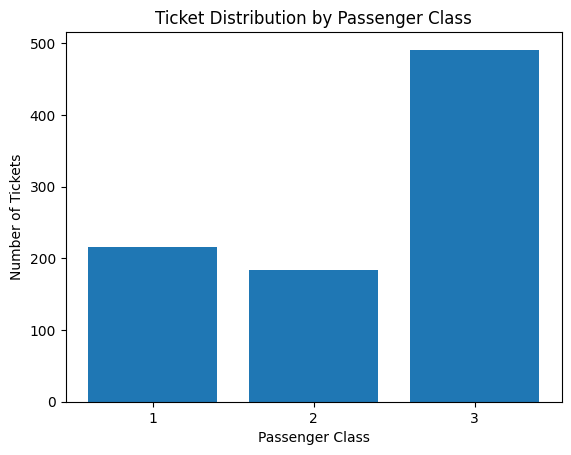

In [53]:
plt.bar(pclass_df["Pclass"], pclass_df["Ticket"])
plt.xlabel("Passenger Class")
plt.ylabel("Number of Tickets")
plt.title("Ticket Distribution by Passenger Class")
plt.xticks([1, 2, 3])
plt.show()

Şimdi hayatta kalanlara **survivors** bakalım.

❓ Her yolcu sınıfının hayatta kalma oranını  *survival rate* gösteren bir bar chart plot et.
`0` ,  o sınıfta kimsenin hayatta kalmadığı, `1` ise herkesin hayatta kaldığı anlamına gelir. 

In [56]:
psurvived_df=titanic_df.groupby("Pclass")["Survived"].mean().reset_index()
psurvived_df

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


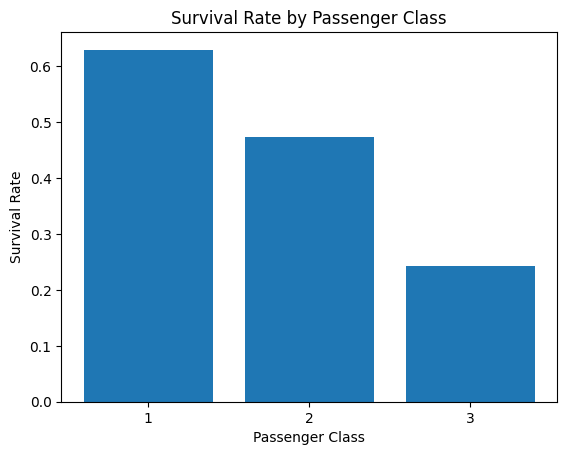

In [60]:
plt.bar(psurvived_df["Pclass"], psurvived_df["Survived"])
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.xticks([1, 2, 3])
plt.show()

### Gender Analysis

`Sex`  sütununa bir göz atalım.

❓ Bu sütunda kullanılan farklı değerleri kontrol etmek için [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) fonksiyonunu kullan.

In [62]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

❓ Her cinsiyetin hayatta kalma oranını *survival rate*  gösteren bir bar chart plot et.
Verilere göre, hangi cinsiyetin hayatta kalma ihtimali daha yüksekti?

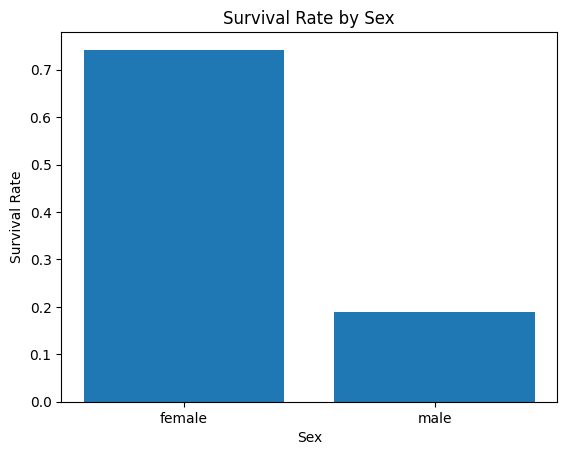

In [67]:
ssurvival=titanic_df.groupby("Sex")["Survived"].mean().reset_index()
ssurvival
plt.bar(ssurvival["Sex"], ssurvival["Survived"])
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Sex")

plt.show()


In [66]:
ssurvival=titanic_df.groupby("Sex")["Survived"].mean().reset_index()
ssurvival



,Sex,Survived
0,female,0.742038
1,male,0.188908


In [64]:
ssurvival=titanic_df.groupby("Sex")["Survived"].mean()

Her cinsiyet için toplam yolcu sayısını ve toplam hayatta kalan sayısını birlikte gösterdiğimiz daha şık bir histogram oluşturalım.

❓`Total` ve `Survived`  olmak üzere iki sütunlu, `male` and `female` şeklinde iki satırlı bir `survivors_df` DataFrame oluştur ve plot et.

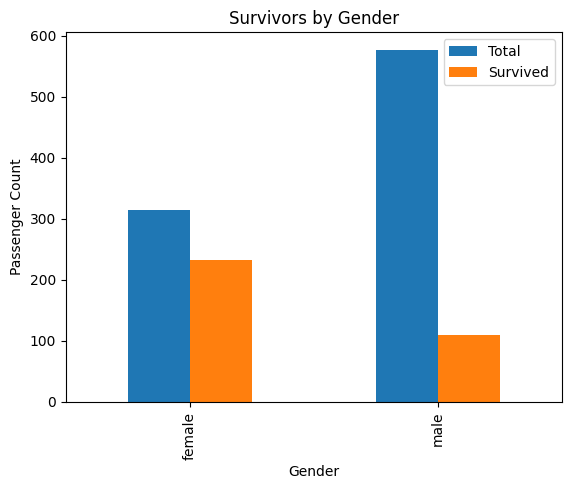

In [69]:
survivors_df=titanic_df.groupby("Sex").agg(Total=("Survived", "count"), Survived=("Survived", "sum"))
survivors_df
survivors_df.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Passenger Count")
plt.title("Survivors by Gender")
plt.show()


## Children

Önceki analiz yaşları dikkate almıyordu. Bir çocuğu bir yetişkinden ayırmak ve bunun hayatta kalma oranlarını *survival rates* nasıl etkilediğini görmek istiyoruz.

❓ Boolean indexing kullanarak yalnızca çocuk yolcuların satırlarını içeren bir `children_df` oluştur.

In [99]:
children_df=titanic_df[titanic_df["Age"]<18]
cr=children_df["Survived"].mean()
cr

0.5398230088495575

❓ Titanic’te kaç çocuk vardı?

In [74]:
children_df["PassengerId"].count()

113

❓Kaç çocuk hayatta kaldı?

In [77]:
children_df[children_df["Survived"]==1]["PassengerId"].count()


61

❓ Her kategori için( `male`, `female`, `children`).hayatta kalanlar / toplam oranını gösteren bir bar chart plot et. Unutma: `male` istatistiklerinden erkek çocukları, `female` istatistiklerinden ise kız çocukları çıkarman **substract** gerekiyor.

In [97]:
adult_male=titanic_df[(titanic_df["Age"]>=18) & (titanic_df["Sex"]=="male")]
amr=adult_male["Survived"].mean()
amr

0.17721518987341772

In [93]:
adult_female=titanic_df[(titanic_df["Age"]>=18) & (titanic_df["Sex"]=="female")]
afr=adult_female["Survived"].mean()
afr

0.7718446601941747

In [105]:
rate_df=pd.DataFrame({"Category": ["Children", "Adult Female", "Adult Male"], 
                     "Survival Rate": [cr, afr, amr]})
rate_df

,Category,Survival Rate
0,Children,0.539823
1,Adult Female,0.771845
2,Adult Male,0.177215


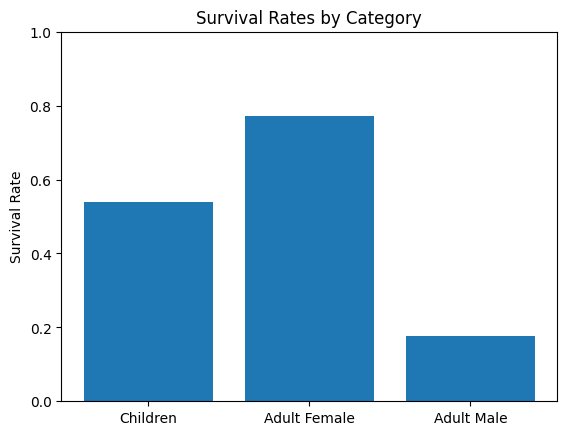

In [106]:
plt.bar(rate_df["Category"], rate_df["Survival Rate"])

plt.ylabel("Survival Rate")
plt.title("Survival Rates by Category")
plt.ylim(0, 1)

plt.show()

## [Opsiyonal] Big families

❓ Daha büyük ailelerin hayatta kalması daha mı zordu?

Burada, yolcunun aile büyüklüğünü gösteren yeni bir sütunu `DataFrame` ine ekleyeceksin.
  

In [109]:
titanic_df.head(3)
titanic_df["familysize"]=titanic_df["SibSp"]+titanic_df["Parch"]+1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


## [Opsiyonal] Distinguished titles

❓ Tahliye sırasında ünvanı (Mr, Mrs, Dr vb.) olan yolculara daha fazla öncelik verildi mi?

Bunu incelemek için, bazı string manipülasyonları yaparak her yolcu için ünvanını içeren yeni bir sütun oluştur.

In [110]:
titanic_df["Title"] = titanic_df["Name"].str.extract(r',\s*([^.]*)\.')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familysize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss


In [111]:
titanic_df.groupby("Title")["Survived"].mean()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64